### 2.2. Алгоритми випадкового дизерингу

In [4]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Завантаження зображення в градаціях сірого та нормалізація
img = Image.open("cat.jpg").convert("L")
img_np = np.array(img) / 255.0  # Значення в [0, 1]

def show_comparison(original, dithered, title):
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.title("Оригінал (градації сірого)")
    plt.imshow(original, cmap='gray')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title(title)
    plt.imshow(dithered, cmap='gray')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


2.2.1. Простий випадковий дизеринг

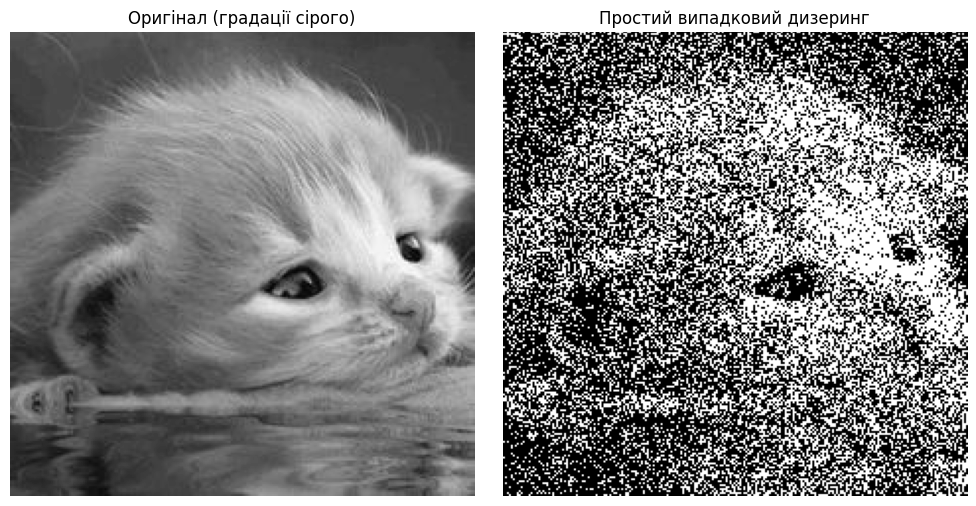

In [5]:
def random_dither(image, d=0.5):
    noise = np.random.uniform(-d, d, image.shape)
    noisy = image + noise
    dithered = (noisy > 0.5).astype(float)
    return dithered

dithered = random_dither(img_np)
show_comparison(img_np, dithered, "Простий випадковий дизеринг")


2.2.2. Рівномірний випадковий дизерин

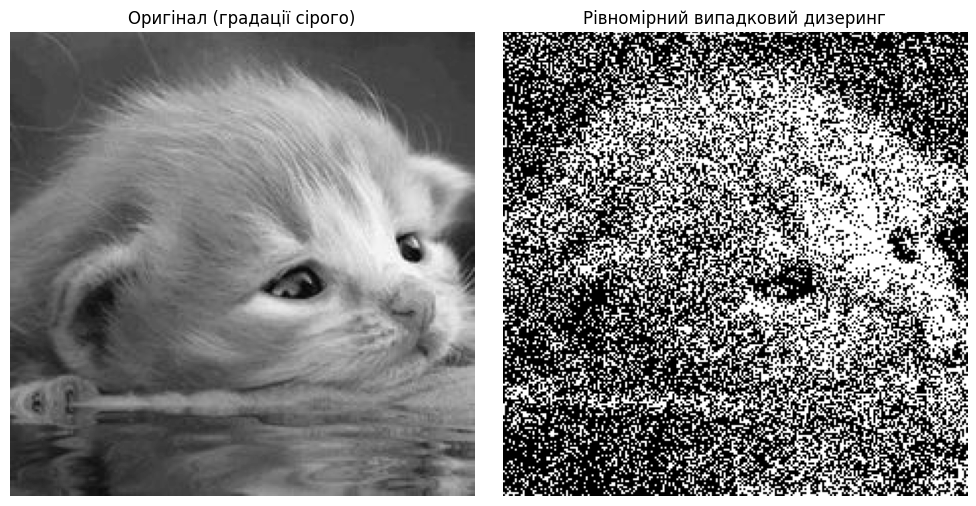

In [6]:
def uniform_random_dither(image):
    thresholds = np.random.rand(*image.shape)  # Випадкові пороги в [0, 1]
    dithered = (image > thresholds).astype(float)
    return dithered

dithered = uniform_random_dither(img_np)
show_comparison(img_np, dithered, "Рівномірний випадковий дизеринг")


2.2.3. Гауссовий випадковий дизеринг

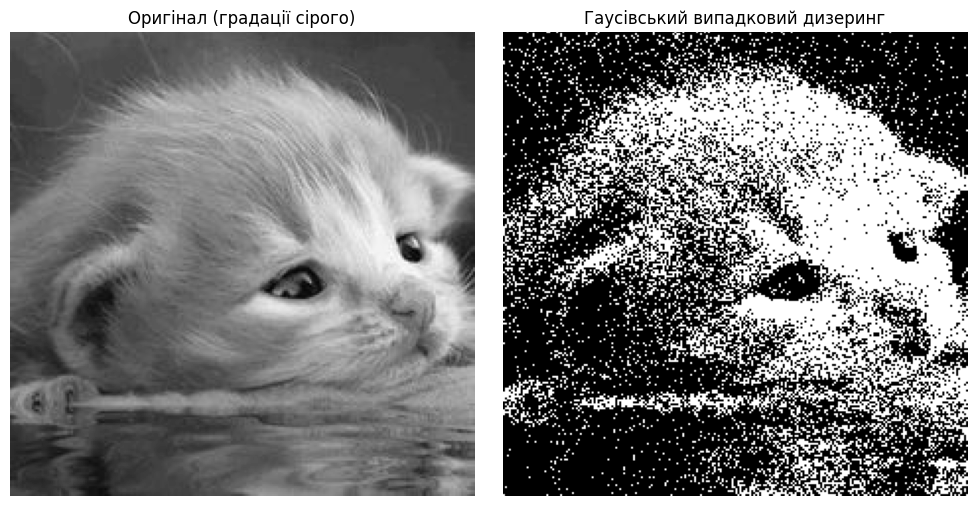

In [7]:
def gaussian_random_dither(image, mean=0.5, std=0.15):
    thresholds = np.random.normal(mean, std, image.shape)
    thresholds = np.clip(thresholds, 0.0, 1.0)
    dithered = (image > thresholds).astype(float)
    return dithered

dithered = gaussian_random_dither(img_np)
show_comparison(img_np, dithered, "Гаусівський випадковий дизеринг")

2.2.4. Випадковий упорядкований дизеринг

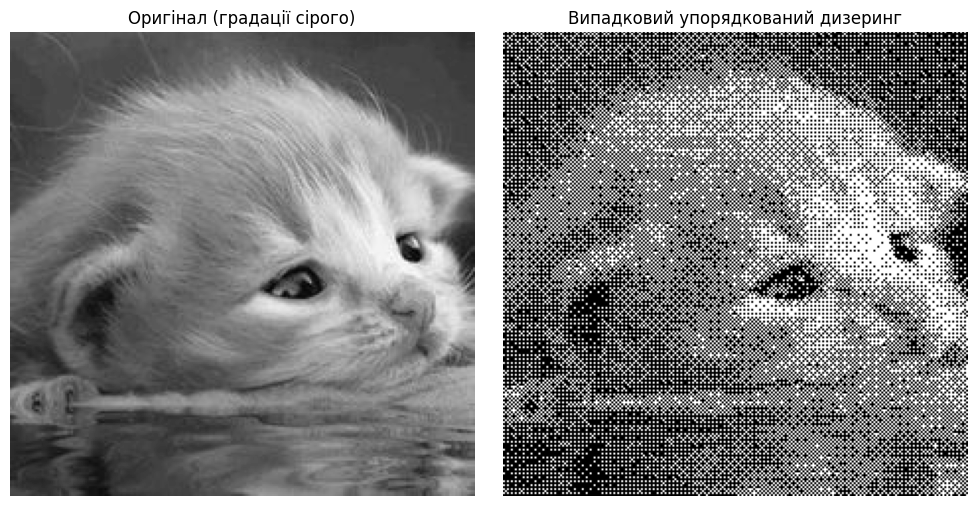

In [8]:
def generate_bayer_matrix():
    base = np.array([
        [0, 8, 2, 10],
        [12, 4, 14, 6],
        [3, 11, 1, 9],
        [15, 7, 13, 5]
    ])
    return (base + 0.5) / 16.0

def random_ordered_dither(image, noise_std=0.05):
    h, w = image.shape
    bayer = generate_bayer_matrix()
    tiled_bayer = np.tile(bayer, (h // 4 + 1, w // 4 + 1))[:h, :w]
    noise = np.random.normal(0, noise_std, (h, w))
    thresholds = np.clip(tiled_bayer + noise, 0.0, 1.0)
    dithered = (image > thresholds).astype(float)
    return dithered

dithered = random_ordered_dither(img_np)
show_comparison(img_np, dithered, "Випадковий упорядкований дизеринг")
